# Weighted A* Search Algo with Dataset as input

In this lab, I will be running the weighted A* Algo on the computer network but instead of taking the input from the user I taken a dataset from kaggle (https://www.kaggle.com/prasertk/internet-broadband-and-mobile-speeds-by-country) which has location wise speed for mobile and broadband which I have user in my heruistic. For distance between the countires I have used a dataset from kaggle (https://www.kaggle.com/vinitasilaparasetty/country-coordinates-world) which gives the latitude and longitude between the countries which I used to find distance between them

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./internet broadband and mobile speeds by country.csv')
df.head()

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
0,Monaco,1.0,192.68,NaN,NaN,January 2022
1,Singapore,2.0,192.01,19.0,64.92,January 2022
2,Chile,3.0,189.36,109.0,15.50,January 2022
3,Thailand,4.0,184.03,56.0,32.38,January 2022
4,Hong Kong (SAR),5.0,173.42,38.0,45.86,January 2022


In [3]:
df.describe()

,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps
count,179.000000,179.000000,139.000000,139.000000
mean,90.000000,47.210223,70.215827,34.885324
std,51.816986,43.673860,40.565167,26.686496
min,1.000000,1.620000,1.000000,0.530000
25%,45.500000,11.905000,35.500000,15.975000
50%,90.000000,33.760000,70.000000,26.180000
75%,134.500000,68.560000,104.500000,47.320000
max,179.000000,192.680000,140.000000,135.620000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               179 non-null    object 
 1   Broadband Speed Rank  179 non-null    float64
 2   Broadband Mbps        179 non-null    float64
 3   Mobile Speed Rank     139 non-null    float64
 4   Mobile Mbps           139 non-null    float64
 5   As of                 179 non-null    object 
dtypes: float64(4), object(2)
memory usage: 8.5+ KB


In [5]:
df.isna().sum()

Country                  0
Broadband Speed Rank     0
Broadband Mbps           0
Mobile Speed Rank       40
Mobile Mbps             40
As of                    0
dtype: int64

In [6]:
df[df['Mobile Mbps'].isnull()]

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
0,Monaco,1.0,192.68,NaN,NaN,January 2022
11,Liechtenstein,12.0,118.19,NaN,NaN,January 2022
27,Andorra,28.0,92.42,NaN,NaN,January 2022
41,Saint Lucia,42.0,73.70,NaN,NaN,January 2022
44,Barbados,45.0,68.83,NaN,NaN,January 2022
45,San Marino,46.0,68.29,NaN,NaN,January 2022
53,Saint Vincent and the Grenadines,54.0,58.26,NaN,NaN,January 2022
59,Dominica,60.0,50.96,NaN,NaN,January 2022
63,Grenada,64.0,50.66,NaN,NaN,January 2022
82,The Bahamas,83.0,37.69,NaN,NaN,January 2022


In [7]:
df.drop('As of', axis=1, inplace=True)
df.dropna(inplace=True)
df

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps
1,Singapore,2.0,192.01,19.0,64.92
2,Chile,3.0,189.36,109.0,15.50
3,Thailand,4.0,184.03,56.0,32.38
4,Hong Kong (SAR),5.0,173.42,38.0,45.86
5,Denmark,6.0,163.60,8.0,87.11
...,...,...,...,...,...
174,Yemen,175.0,2.74,140.0,0.53
175,Ethiopia,176.0,2.69,78.0,22.83
176,Cuba,177.0,1.90,119.0,12.71
177,Turkmenistan,178.0,1.89,139.0,3.09


In [8]:
df.set_index('Country', inplace=True)

In [9]:
df.head()

,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps
Country,,,,
Singapore,2.0,192.01,19.0,64.92
Chile,3.0,189.36,109.0,15.50
Thailand,4.0,184.03,56.0,32.38
Hong Kong (SAR),5.0,173.42,38.0,45.86
Denmark,6.0,163.60,8.0,87.11


In [10]:
df.loc['Chile']

Broadband Speed Rank      3.00
Broadband Mbps          189.36
Mobile Speed Rank       109.00
Mobile Mbps              15.50
Name: Chile, dtype: float64

In [11]:
print(df['Broadband Mbps'].max())
print(df['Mobile Mbps'].max())

192.01
135.62


## Country Lat and Loc

In [12]:
country = pd.read_csv('./country-coordinates-world.csv')
country.head()

,latitude,longitude,Country
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.546245,1.601554,Andorra


In [13]:
country.describe()

,latitude,longitude
count,244.000000,244.000000
mean,16.253109,13.294814
std,27.031206,73.976477
min,-75.250973,-177.156097
25%,-0.301710,-38.092008
50%,16.869235,18.182149
75%,38.965238,49.046734
max,77.553604,179.414413


In [14]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   244 non-null    float64
 1   longitude  244 non-null    float64
 2   Country    244 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [15]:
country.isna().sum()

latitude     0
longitude    0
Country      0
dtype: int64

In [16]:
country.set_index('Country', inplace=True)

In [17]:
country.head()

,latitude,longitude
Country,,
Afghanistan,33.939110,67.709953
Albania,41.153332,20.168331
Algeria,28.033886,1.659626
American Samoa,-14.270972,-170.132217
Andorra,42.546245,1.601554


In [18]:
country.loc['Algeria']

latitude     28.033886
longitude     1.659626
Name: Algeria, dtype: float64

## Weighted A*Algo

In [19]:
from math import radians, cos, sin, asin, sqrt

In [20]:
df.index

Index(['Singapore', 'Chile', 'Thailand', 'Hong Kong (SAR)', 'Denmark',
       'Macau (SAR)', 'China', 'United States', 'Spain', 'Romania',
       ...
       'Mozambique', 'Zimbabwe', 'Zambia', 'Sudan', 'Syria', 'Yemen',
       'Ethiopia', 'Cuba', 'Turkmenistan', 'Afghanistan'],
      dtype='object', name='Country', length=139)

In [21]:
class Computer_network_complex:
    def __init__(self, adjacency_list_wired, adjacency_list_online, database, country_db, packet_type = "Both"):
        self.adjacency_list_wired = adjacency_list_wired
        self.adjacency_list_online = adjacency_list_online
        self.database = database
        self.country = country_db
        self.packet_type = packet_type; # Possible values: Wired, Wireless, Both
    
    def get_neighbors_wired(self, node):
        return self.adjacency_list_wired[node]
    
    def get_neighbors_online(self, node):
        return self.adjacency_list_online[node]
    
    def get_neighbors_both(self, node):
        neighbours = {}
        for i in adjacency_list_wired:
            neighbours[i] = self.adjacency_list_wired[i] + self.adjacency_list_online[i]
        return neighbours[node]
    
    def get_distance(self, node1, node2):
        country1 = self.country.loc[node1]
        country2 = self.country.loc[node2]
        
        # Haversine formula
        lat1 = radians(country1[0])
        lon1 = radians(country1[1])
        lat2 = radians(country2[0])
        lon2 = radians(country2[1])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * asin(sqrt(a))
        
        # Radius of earth 6371
        return c * 6371
        
    
    def number_of_nodes(self):
        return len(adjacency_list_wired)
    
    def number_of_edges(self):
        edges = 0
        if(self.packet_type == "Wired"): 
            for node in self.adjacency_list_wired:
                for edge in self.adjacency_list_wired[node]:
                    edges += 1
        elif(self.packet_type == "Wireless"): 
            for node in self.adjacency_list_online:
                for edge in self.adjacency_list_online[node]:
                    edges += 1
        else:
            for node in self.adjacency_list_wired:
                for edge in self.adjacency_list_wired[node]:
                    edges += 1
            for node in self.adjacency_list_online:
                for edge in self.adjacency_list_online[node]:
                    edges += 1
        
        return edges//2
    
    def heuristic_function1(self, n, stop_node):
        node = self.database.loc[n]
        brodband_mbps = node[1]
        mobile_mbps = node[2]
        delay = self.get_distance(n, stop_node)
        
        return (delay*192.01*135.62/(brodband_mbps*mobile_mbps))
    
    def heuristic_function2(self, n):
        node = self.database.loc[n]
        total_nodes = self.number_of_nodes()
        brodband_rank = node[0]
        mobile_rank = node[3]
        if(self.packet_type == "Wired"):
            num_of_neighbors = len(self.get_neighbors_wired(n))
        elif(self.packet_type == "Wireless"):
            num_of_neighbors = len(self.get_neighbors_online(n))
        else:
            num_of_neighbors = len(self.get_neighbors_both(n))
        return ((total_nodes // num_of_neighbors) + brodband_rank*mobile_rank)
    
    def weighted_a_star(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        
        total_edges = self.number_of_edges()
        w = 0
        moves = 0
        while len(open_list) > 0:
            n = None
            for node in open_list:
                if n == None or (g[node] + (1-w)*self.heuristic_function2(node) + w*self.heuristic_function1(node, stop_node)) < (g[n] +  (1-w)*self.heuristic_function2(node) + w*self.heuristic_function1(n, stop_node)):
                    n = node
            
            if n == None:
                print('No path exists...')
                return None
            
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    
                path.append(start_node)
                path.reverse()
                
                print('Path Found:', path)
                return path
            
            if(self.packet_type == "Wired"):
                for (m) in self.get_neighbors_wired(n):
                    weight = self.get_distance(n, m)
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Online"):
                for (m) in self.get_neighbors_online(n):
                    weight = self.get_distance(n, m)
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Both"):
                for (m) in self.get_neighbors_both(n):
                    weight = self.get_distance(n, m)
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            else:
                print("Inappropriate packet type selected")
                break
            
            moves += 1
            w = moves // total_edges
            open_list.remove(n)
            closed_list.add(n)

        print('No path exists...')
        return None

In [22]:
adjacency_list_wired = {
    'Singapore': [('Sudan'), ('Cuba')],
    'Sudan': [('Singapore'), ('Afghanistan'), ('India')],
    'Spain': [('Cuba')],
    'Afghanistan': [('Sudan'), ('Denmark')],
    'Cuba': [('Singapore'), ('Spain')],
    'India': [('Sudan')],
    'Denmark': [('Afghanistan'), ('Zimbabwe'), ('Thailand')],
    'Zimbabwe': [('Denmark')],
    'China': [('Thailand')],
    'Thailand': [('Denmark'), ('China')],
}

adjacency_list_wireless = {
    'Singapore': [('Sudan'), ('Afghanistan')],
    'Sudan': [('Singapore'), ('Denmark')],
    'Spain': [('China')],
    'Afghanistan': [('Singapore'), ('Denmark')],
    'Cuba': [('Zimbabwe')],
    'India': [('Thailand')],
    'Denmark': [('Afghanistan'), ('Sudan')],
    'Zimbabwe': [('Cuba')],
    'China': [('Thailand'), ('Spain')],
    'Thailand': [('India'), ('China')],
}

In [23]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, df, country,packet_type="Wired")
network.weighted_a_star('Singapore', 'Thailand')

Path Found: ['Singapore', 'Sudan', 'Afghanistan', 'Denmark', 'Thailand']


['Singapore', 'Sudan', 'Afghanistan', 'Denmark', 'Thailand']

In [24]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, df, country,packet_type="Online")
network.weighted_a_star('Singapore', 'Thailand')

No path exists...


In [25]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, df, country,packet_type="Both")
network.weighted_a_star('Singapore', 'Thailand')

Path Found: ['Singapore', 'Sudan', 'India', 'Thailand']


['Singapore', 'Sudan', 'India', 'Thailand']

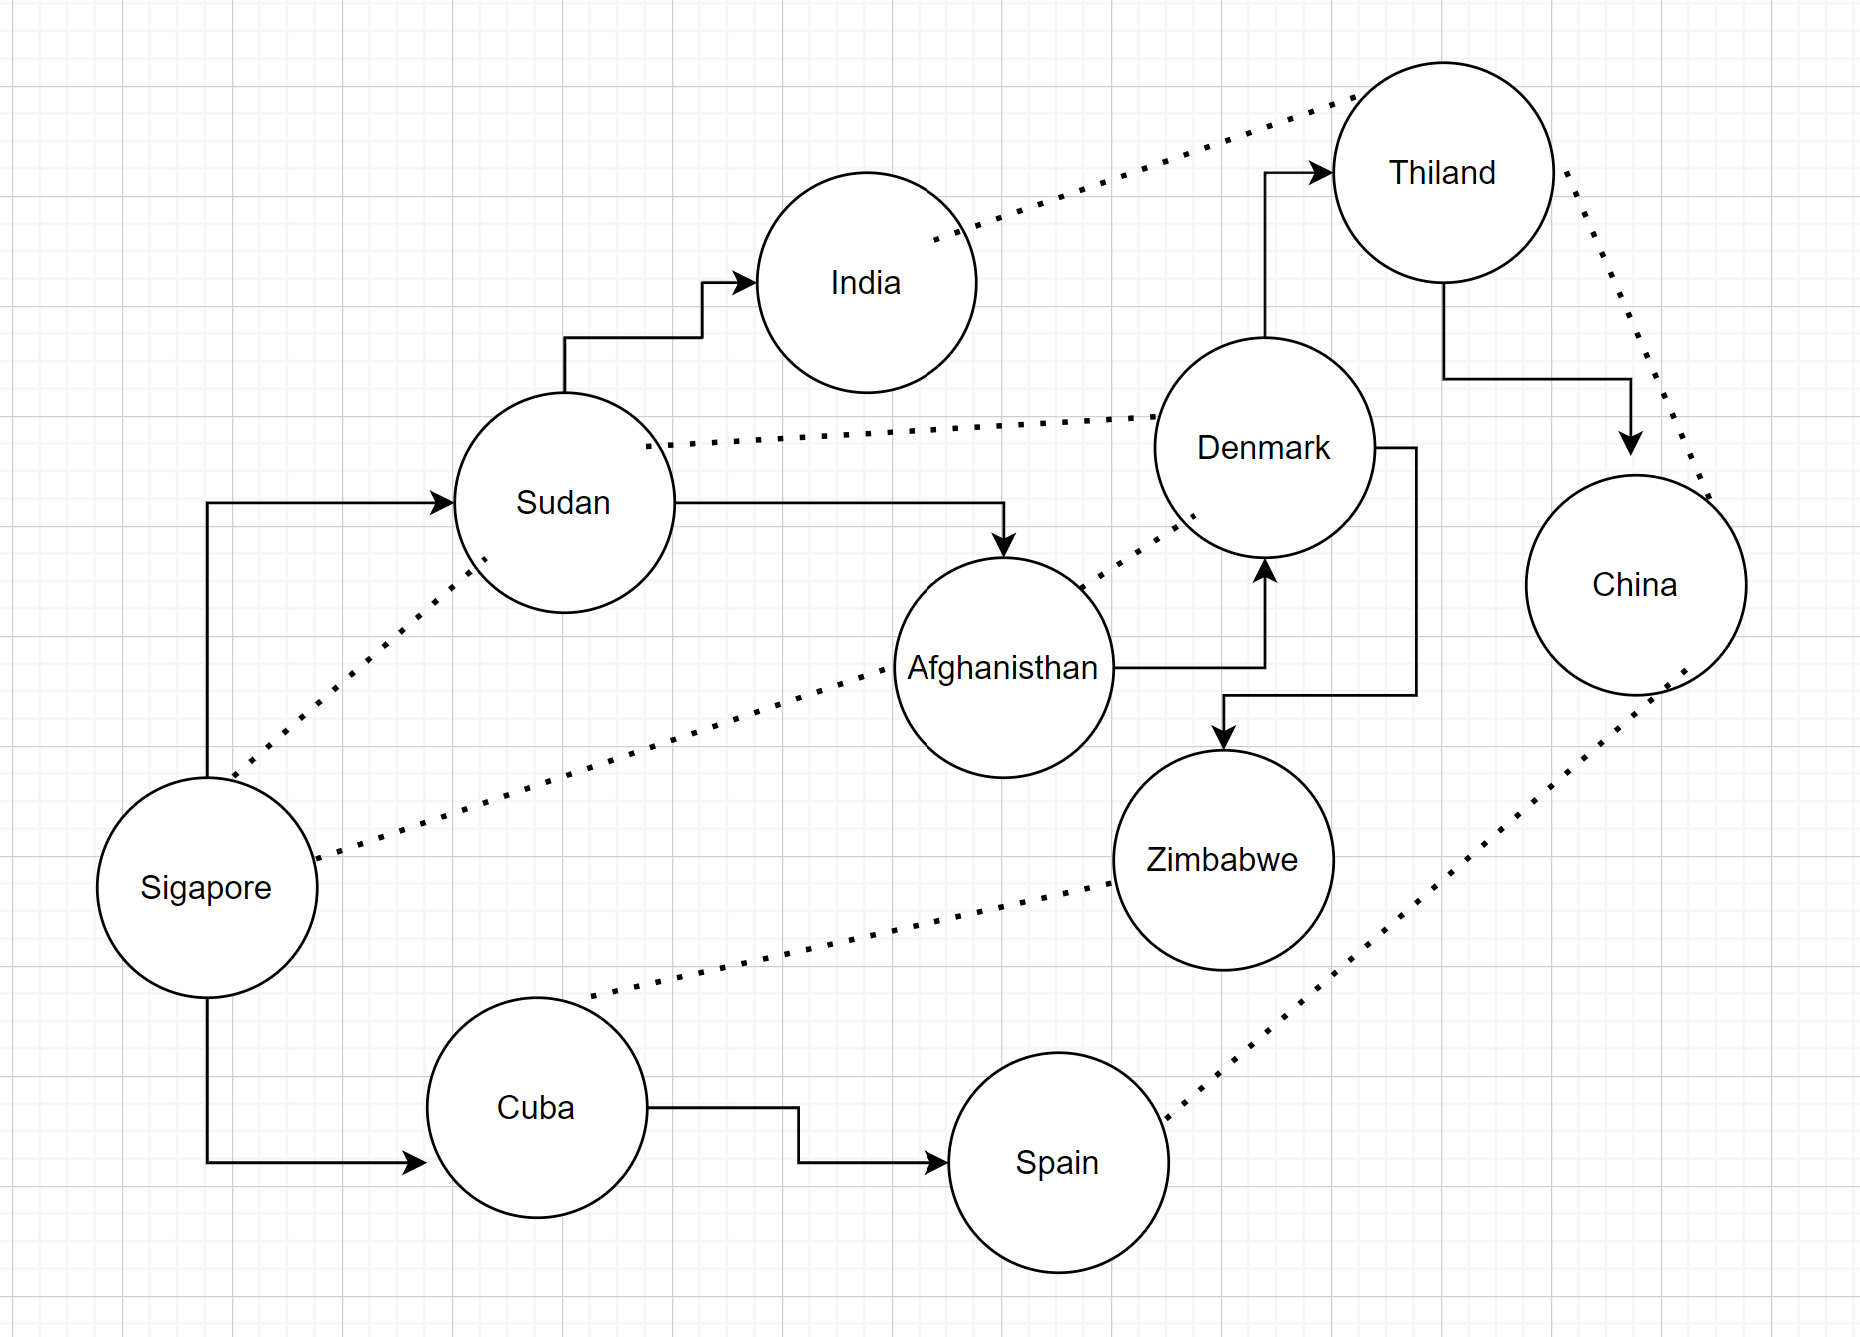

## Visulizing

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
def get_distance(country, node1, node2):
        country1 = country.loc[node1]
        country2 = country.loc[node2]
        
        # Haversine formula
        lat1 = radians(country1[0])
        lon1 = radians(country1[1])
        lat2 = radians(country2[0])
        lon2 = radians(country2[1])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * asin(sqrt(a))
        
        # Radius of earth 6371
        return c * 6371

In [52]:
def draw_path_graph(path, adjacency_list_wired, adjacency_list_wireless):
    G_path = nx.Graph()
    for node in adjacency_list_wired:
        G_path.add_node(node)
    for node in adjacency_list_wired:
        for edge in adjacency_list_wired[node]:
            G_path.add_edge(node, edge, weight=int(get_distance(country, node, edge)), mode="wired")

    for node in adjacency_list_wireless:
        for edge in adjacency_list_wireless[node]:
            G_path.add_edge(node, edge, weight=int(get_distance(country, node, edge)), mode="wireless")
    
    color_map = []
    for node in G_path:
        if node in path:
            color_map.append('red')
        else:
            color_map.append('yellow')
    path_index = 0
    edge_colors = []
    for u, v in G_path.edges():
        if(path_index < len(path)-1 and (u == path[path_index] and v==path[path_index+1])): 
            edge_colors.append('red')
            path_index += 1
        else:
            edge_colors.append('black')
    
    pos=nx.spring_layout(G_path)
    edges = G_path.edges()
    edge_labels = nx.get_edge_attributes(G_path, 'weight')
    nx.draw(G_path, pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=color_map, node_size=3000)
    nx.draw_networkx_edge_labels(G_path, pos, edge_labels=edge_labels)
    plt.show()

In [44]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, df, country,packet_type="Wired")
path1 = network.weighted_a_star('Singapore', 'Thailand')

Path Found: ['Singapore', 'Sudan', 'Afghanistan', 'Denmark', 'Thailand']


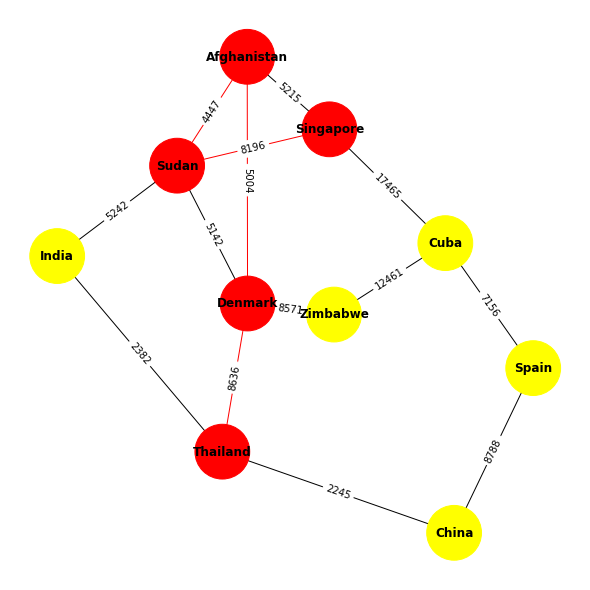

In [53]:
plt.figure(figsize=(8, 8))
draw_path_graph(path1, adjacency_list_wired, adjacency_list_wireless)
plt.show()

In [54]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, df, country,packet_type="Both")
path1 = network.weighted_a_star('Singapore', 'Thailand')

Path Found: ['Singapore', 'Sudan', 'India', 'Thailand']


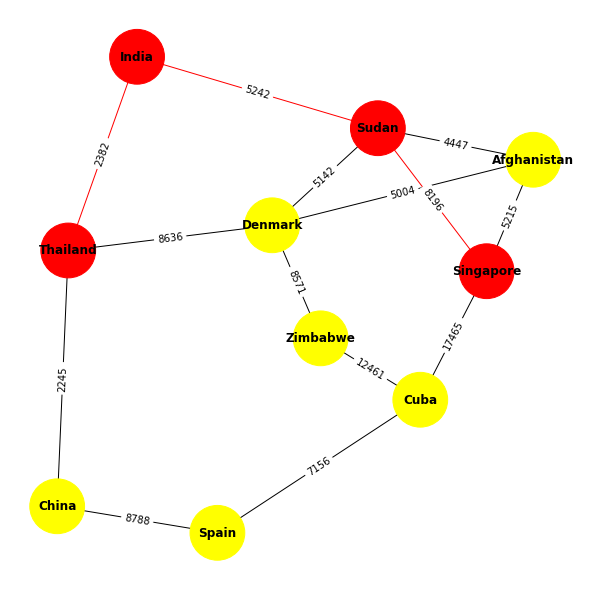

In [55]:
plt.figure(figsize=(8, 8))
draw_path_graph(path1, adjacency_list_wired, adjacency_list_wireless)
plt.show()